In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 34.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


Enter the name of a score attribute: Q1
Entropy (H) of attribute 'Q1': 2.5248962387450886
Average Entropy (AE) of attribute 'Q1': 0.8643297071195146
Information Gain (IG) of attribute 'Q1': 0.05766599597492594
Accuracy: 1.0


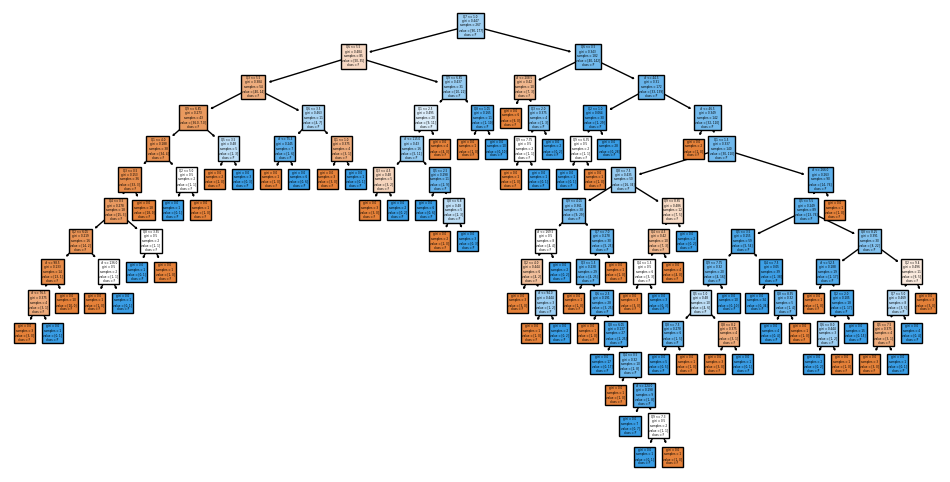

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/dt_data.csv')
# 1. Calculate Entropy, Average Entropy, and Information Gain
# Function to calculate entropy
def entropy(data, attribute):
    total_count = len(data)
    attribute_values = data[attribute].unique()
    entropy_value = 0

    for value in attribute_values:
        value_count = len(data[data[attribute] == value])
        probability = value_count / total_count
        entropy_value += -probability * math.log2(probability)

    return entropy_value
# Function to calculate average entropy
def average_entropy(data, attribute):
    total_count = len(data)
    attribute_values = data[attribute].unique()
    average_entropy_value = 0

    for value in attribute_values:
        value_data = data[data[attribute] == value]
        value_count = len(value_data)
        value_entropy = entropy(value_data, 'Rank')
        average_entropy_value += (value_count / total_count) * value_entropy

    return average_entropy_value
# Function to calculate information gain
def information_gain(data, attribute):
    entropy_full = entropy(data, 'Rank')
    average_entropy_value = average_entropy(data, attribute)
    information_gain_value = entropy_full - average_entropy_value

    return information_gain_value

attribute_name = input("Enter the name of a score attribute: ")
# Calculate and display entropy, average entropy, and information gain
entropy_value = entropy(data, attribute_name)
average_entropy_value = average_entropy(data, attribute_name)
information_gain_value = information_gain(data, attribute_name)
print(f"Entropy (H) of attribute '{attribute_name}': {entropy_value}")
print(f"Average Entropy (AE) of attribute '{attribute_name}': {average_entropy_value}")
print(f"Information Gain (IG) of attribute '{attribute_name}': {information_gain_value}")

# 2. Implement, train, and evaluate a Decision Tree model
# Separate features and target variable
X = data.drop(['Rank'], axis=1)
y = data['Rank']
# Create and train the decision tree model
model = DecisionTreeClassifier()
model.fit(X, y)
# Evaluate the model
accuracy = model.score(X, y)
print("Accuracy:", accuracy)
# Visualize the decision tree
fig = plt.figure(figsize=(12, 6))
_ = tree.plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.show()